# Análise das Entregas do E-Commerce de um Comércio de Eletrônicos

**Autor: Ranieri Miranda Imperatori**

*Descrição do cenário de análise*: O objetivo deste trabalho, é descobrir informações relevantes no banco de dados da empresa contratante, levando em conta se a entrega foi entregue dentro do prazo ou atrasada. Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir uma compra no site da empresa, o cliente recebe o produto em casa. Os produtos são enviados através de Navio, Avião ou Caminhão, dependendo da região da entrega.  
  
Em cada compra, o cliente pode receber um desconto, dependendo do peso do produto comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas; e após receber o produto, o cliente pode deixar uma avaliação sobre a experiência de compra. O único dado pessoal disponível sobre o cliente, é o gênero.

**Os dados mostrados neste notebook, são fictícios; mas que representam dados reais!**

In [5]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste trabalho: ', python_version())

Versão da Linguagem Python usada neste trabalho:  3.9.7


In [6]:
# Importante as bibliotecas que serão utilizadas neste trabalho
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## **1-Carregando o Dataset**

In [8]:
df = pd.read_csv('dados/dataset.csv')

In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Na saíde do código do bloco anterior, podemos ver que o conjunto de dados sobre o qual será feito a análise, possui 11 mil linhas e 12 colunas. Ou seja, possui registros de 11 mil transações com 12 informações (variáveis) para cada transação!

In [10]:
# Visualizando as 5 primeiras linhas do nosso conjunto de dados
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [11]:
# Visualizando 5 registros aleatórios
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
822,823,D,Aviao,3,3,268,3,baixa,F,33,3872,1
9599,9600,F,Aviao,4,1,149,3,baixa,M,2,4499,0
8349,8350,B,Caminhao,5,3,265,5,baixa,F,3,1005,1
6949,6950,F,Navio,3,4,187,3,baixa,F,9,4725,1
7462,7463,C,Navio,5,1,255,5,media,M,9,1156,1


## **2-Análise Exploratório dos Dados - Parte 1**  
  
**Separação das Variáveis Categóricas e Numéricas**

In [12]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [13]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

Nas linhas anteriores deste bloco, visualizamos mais uma vez o nome de nossas variáveis e o tipo de cada uma dessas. A partir de agora, vamos realizar uma separação por listas, entre variáveis numéricas e variáveis categóricas. **É necessário esta separação, pois são variáveis que apresentam comportamentos diferentes. Portanto, também vamos analisá-las de maneiras diferentes!**

In [14]:
# Lista de variáveis categóricas

cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [15]:
# Lista de variáveis numéricas

nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']

Na lista das variáveis categóricas, não adotamos a variável 'entregue_no_prazo', pois ela é um tipo de *variável target*. Vamos estruturar esta análise, de forma que seja possível futuramente, realizar análises preditivas (Machine Learning) à partir deste conjunto de dados que estamos processando!  
  
Vejamos as informações sobre as entregas realizadas nos prazos a seguir:

In [16]:
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

Temos 6563 entregas que foram realizadas dentro do prazo e 4437 entregas que foram entregues atrasdas.  
Vamos separar esta variável sob o nome target, para cruzar informações entre variáveis numéricas e categórias com base em nossa variável target (*variável alvo*).

In [17]:
target = ['entregue_no_prazo']

### **2.1-Explorando as Variáveis Numéricas**

In [18]:
# Resumo das variáveis numéricas

df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Observações:  
1. As colunas 'numero_chamdas_cliente', 'avaliacao_cliente' e 'custo_produto' parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes)!  
  

2. As colunas 'compras_anteriores' e 'desconto' parecem estar inclinadas para a direita (média maior que a mediana).  
  
  
3. A coluna 'peso_gramas' parece estar mais inclinada para a esquerda (média menor que a mediana).  


    

<AxesSubplot:>

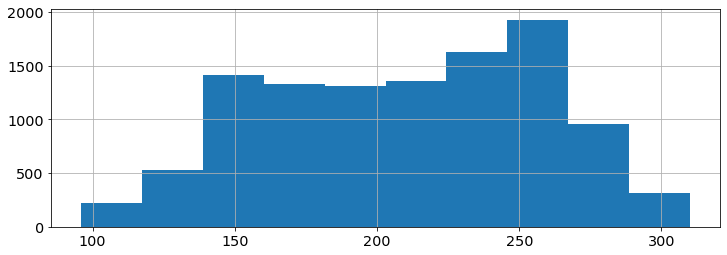

In [19]:
df['custo_produto'].hist()

<AxesSubplot:>

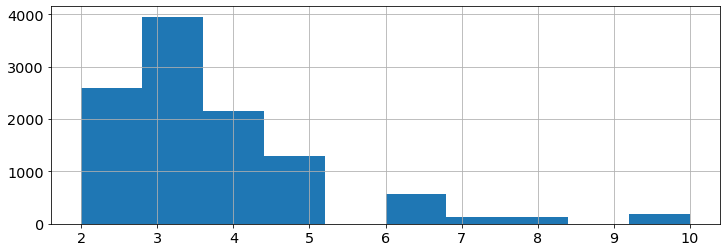

In [20]:
df['compras_anteriores'].hist()

<AxesSubplot:>

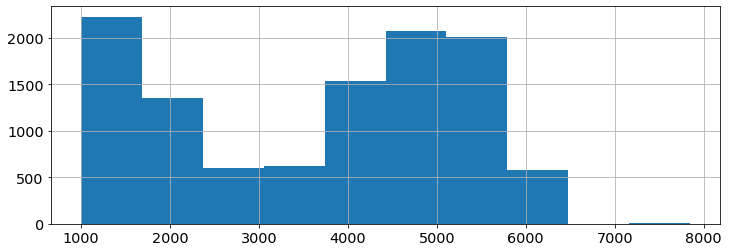

In [21]:
df['peso_gramas'].hist()

### **2.2-Explorando as Variáveis Categóricas**

In [22]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Intepretação da tabela acima:  
* Para a variável corredor_armazem, **F** é a clase dominante.  
* Para a variável de modo_de_envio, **Navio** é a classe dominante.  
* Para a variável de prioridade do produto, **baixa** é a classe dominante.  
* Para a variável de gênero, **F(Feminino)** é a classe dominante.  
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**.  
  
      
Podemos levantar as seguintes perguntas com a equipe de gestores:  
* O corredor F do armazem de estoque, possui fácil acesso?  
* É possível melhorar a posição e organização dos produtos do corredor F?
* Um produto enviado através de Navio, tem mais chance de ser um produto entregue no prazo ou em atraso?  
* Produtos destinados ao público Feminino, gera algum impacto no prazo de entrega?

In [23]:
# Listando o total por categoria de cada variável categórica

for col in cats:
    print(f'''Total de Registros por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registros por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registros por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registros por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



### **2.3-Análise Univariada - Box Plots (Numéricas)**

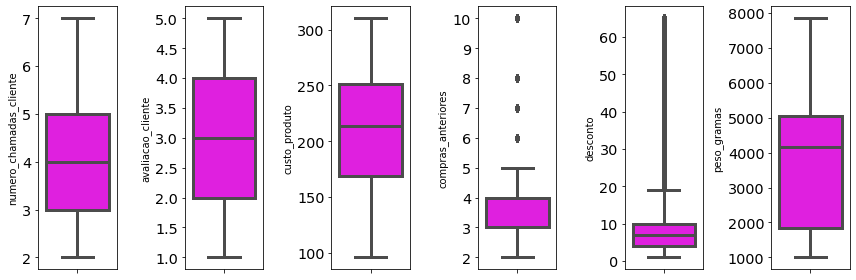

In [24]:
features = nums

for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

Cada uma das caixas acimas, contém a distribuição dos respectivos dados. Podemos perceber que as variáveis compras_anteriores e desconto, possuem *outliers*: isso pode ser ou não um problema. Vamos decidir mais a frente.

### **2.4-Análise Univariada - Dist Plots (Numéricas)**

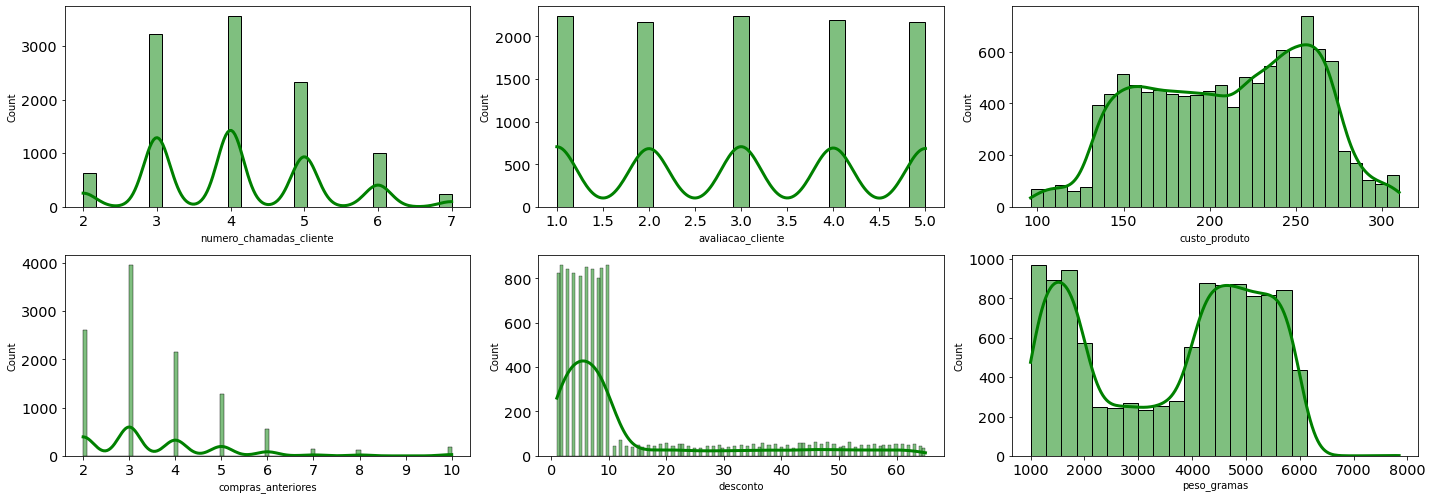

In [25]:
features = nums

plt.figure(figsize = (20,10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

O que temos acima:  
* **numero_chamadas_cliente** e **avalicao_cliente**, possuem distribuição uniforme (muda, porém de maneira uniforme).  
* **custo_produto** possui uma distribuição próxima à Distribuição Normal.  
* **compras_anteriores** e **desconto**, possuem distribuição assimétrica.  
* **peso_gramas** não possui uma distribuição bem definida.

### **2.5-Análise Univariada - Count Plots (Categóricas)**

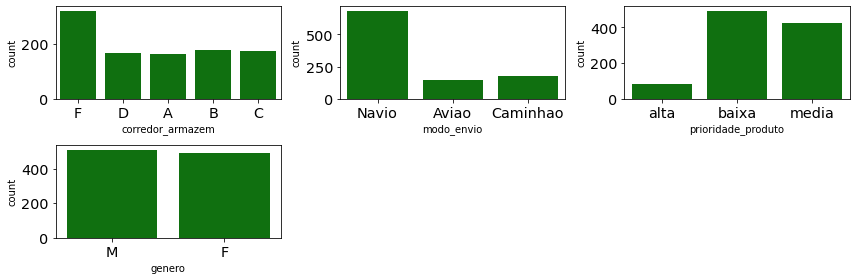

In [26]:
# Utilizando amostragem

df_sample =df.sample(1000, random_state=42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

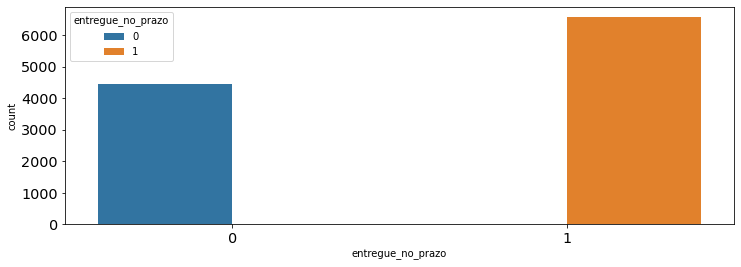

In [27]:
# Count Plot da variável target
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

A partir dos gráficos anteriores, pode-se observar que:  
* A maioria dos produtos enviados, vieram do corredor F.  
* Modo de envio através de Navio é o mais comum.  
* Há poucos produtos com prioridade alta de entrega.  
* A proporção de clientes do sexo Mascunlino e Feminino é praticamente a mesma.  
* A coluna **entregue_no_prazo** é binária, então não há necessidade de prestar muita atenção à forma da distribuição.

### **2.6-Análise Bivariada - Mapa de Correlação**

Na análise bivariada, vamos concentrar em compreender o comportamento de uma variável com base em outra, do nosso conjunto de dados. Ou seja, as análises são realidas em pares de informações.

In [28]:
corr_df = df[nums].corr()
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

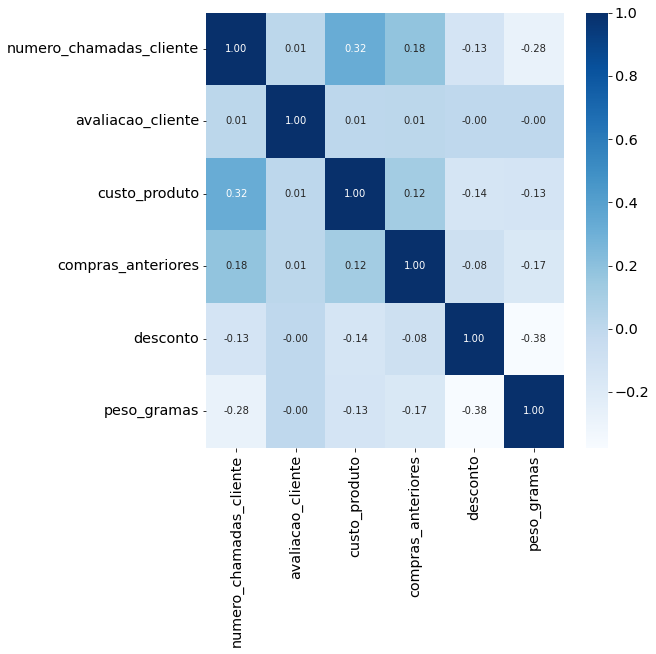

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_df, cmap = "Blues", annot = True, fmt = '.2f')

A correlação (mostrada acima, através do Mapa de Correlação entre as variáveis que estamos trabalhando) é um parâmetro estatístico que vai de -1 a 1. Próximo de 1 significa alta correlaçã positiva; analogamente, próximo de -1 significa alta correlação negativa; e próximo de 0, significa que não há correlação.  
  
  
**Porém, correlação não significa causalidade!** É preciso identificar o motivo das correlações (nos casos acima, é de fácil interpretação).

A partir do Mapa de Correlação acima, pode-se ver que:  
* Há uma correlação positiva entre **numero_chamadas_cliente** e **custo_produto**.  
* Há uma correlação positiva entre **numero_chamadas_cliente** e **compras_anteriores**.  
* Há uma correlação negativa entre **desconto** e **peso_gramas**.  
* E há uma correlação fraca entre as demais variáveis.

### **2.7-Análise Bivariada - Pair Plots**

Vamos comparar as variáveis agora, através de gráficos de dispersão (com intuito de comprovar o que mostramos no Mapa de Correlação anteriormente):

<Figure size 1080x1080 with 0 Axes>

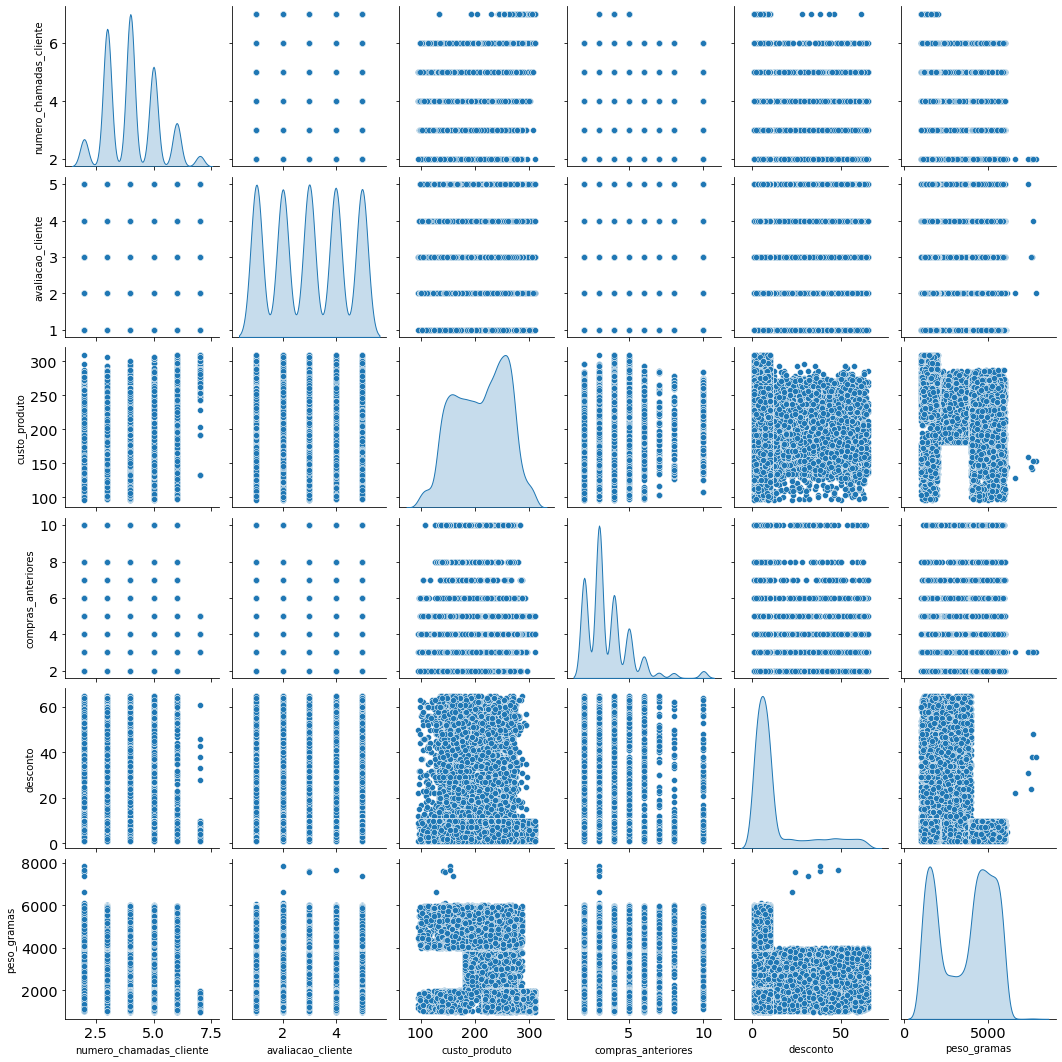

In [30]:
plt.figure(figsize = (15,15))
sns.pairplot(df[nums], diag_kind = 'kde')

### **2.8-Colunas Categórias x Variável Target**

In [31]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

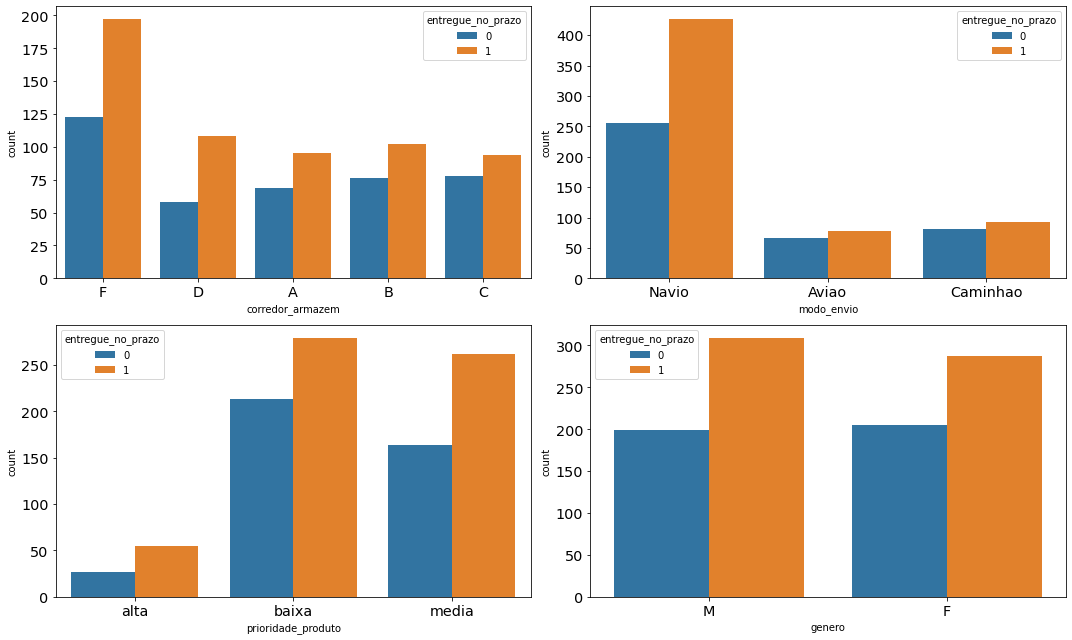

In [32]:
plt.figure(figsize=(15,9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2,2,i+1)
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Observações:  
* Envio por navio tende a apresentar atraso na entrega.  
* Em **prioridade_produto** as categorias baixa e média tendem a apresentar atrasos na entrega. 
* Em **corredor_armazem** produtos do corredor **F** tendem a apresentar atraso na entrega.  
* Produtos comprados por mulheres, tem um volume ligeiramente menor de entregas feitas no prazo.

### **2.9-Conclusão da Análise Exploratória Parte 1**

Considerações sobre este conjunto de dados:  
* Os dados parecem válidos e não há defeitos maiores/significativos.  
* Existem algumas distribuições que são um pouco *assimétricas*; esta característica é importante em caso de aplicar modelos preditivos futuramente neste conjunto de dados!  
* Não foram detectados problemas de multicolinearidade.  
* Algumas variáveis (aparentemente) estão completamente desassociadas.  
* As variáveis **modo_envio, corredor_armazem e importancia_produto** parecemúteis para prever a variável target.

## **3-Análise Exploratório dos Dados - Parte 2**  
  
**3.1- Os atrasos nas entregas está igualmente distribuído pelos modos de envio? Há diferenças discrepantes?**

Até o momento, já constatamos que a maioria das entregas são realizadas por Navios. Portanto, para responder esta primeira pergunta, não podemos apenas consultar o gráfico da seção 2.8, por exemplo; pois ele é baseado em valores absolutos! Vamos realizar os cálculos com os dados do transporte em valores percentuais:

In [33]:
df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [34]:
# buscando valores únicos por ID
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [35]:
df_group2 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index()
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [36]:
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [37]:
df_group4 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index()
df_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [38]:
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [39]:
#Criando nova coluna
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

In [40]:
df_group5.columns = ['Status de Entrega no Prazo',
                    'Modo de Envio',
                    'Total Por Categoria',
                    'Total Geral',
                    'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


Gráfico 1 - Análise em Valores Absolutos

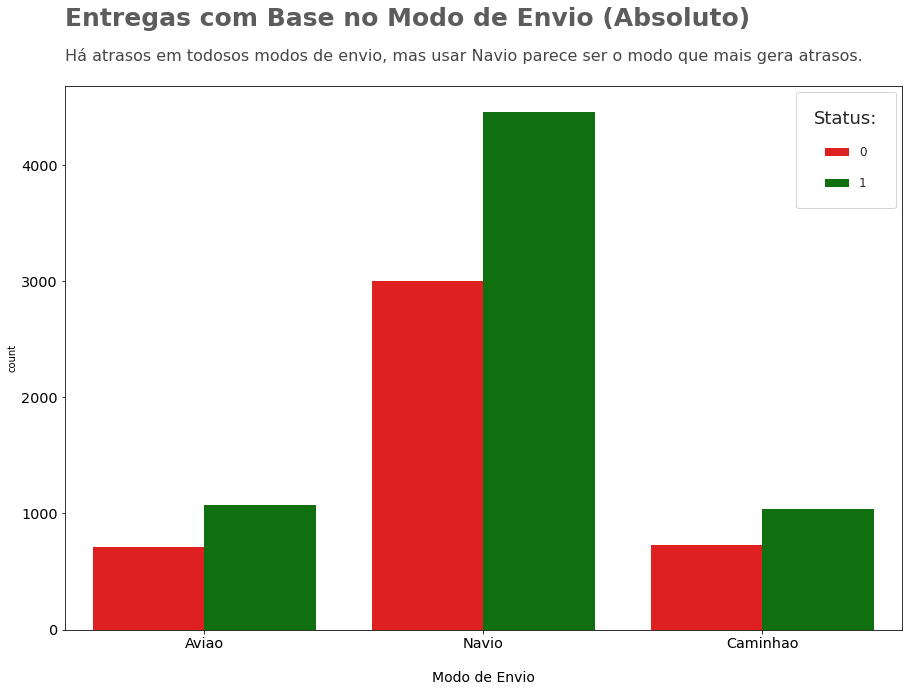

In [41]:
plt.figure(figsize=(15,10))
chart = sns.countplot(data = df, x = 'modo_envio', hue = 'entregue_no_prazo', palette = ['red','green'])

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nModo de Envio', fontsize = 14)

plt.legend(loc = 'upper right', borderpad = 1.5, labelspacing = 1.5, fontsize = 12, title = 'Status:')

chart.text(x = -0.5, y=5200, s = "Entregas com Base no Modo de Envio (Absoluto)", fontsize = 25, weight = 'bold', alpha = .75)

chart.text(x = -0.5, y=4900, s = 'Há atrasos em todosos modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.', fontsize = 16, alpha = .85);

Gráfico 2 - Análise em Valores Percentuais

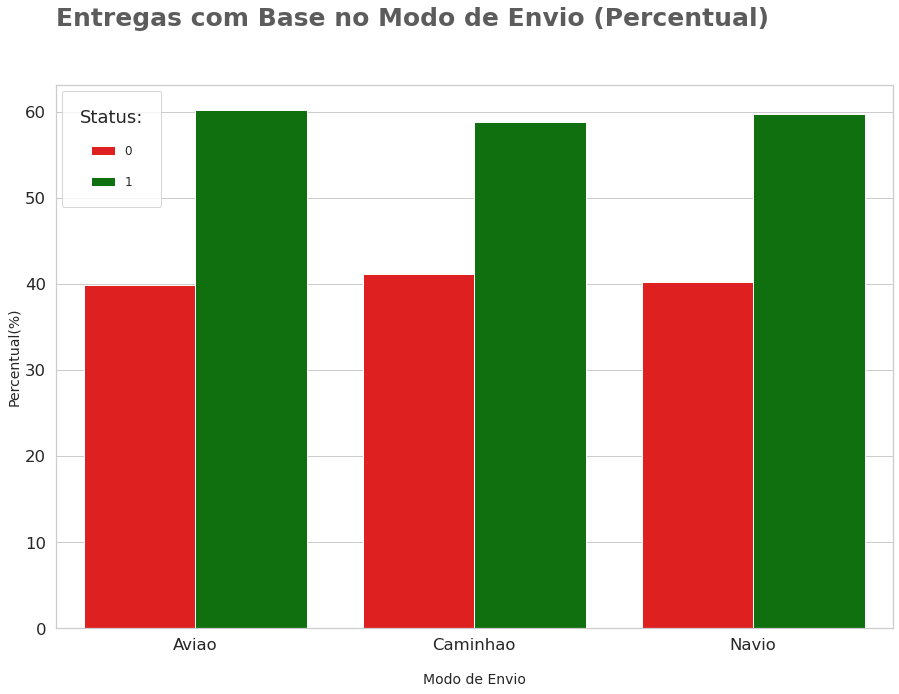

In [42]:
plt.figure(figsize=(15,10))
chart = sns.barplot(x = 'Modo de Envio', y = 'Percentual(%)', data = df_group5, hue = 'Status de Entrega no Prazo', palette = ['red','green'])

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nModo de Envio', fontsize = 14)
chart.set_ylabel('Percentual(%)', fontsize = 14)

plt.legend(loc = 'upper left', borderpad = 1.5, labelspacing = 1.5, fontsize = 12, title = 'Status:')

chart.text(x = -0.5, y=70, s = "Entregas com Base no Modo de Envio (Percentual)", fontsize = 25, weight = 'bold', alpha = .75);

Ou seja, acabamos de concluir que não é necessário a empresa arcar com o modo de transporte mais caro (avião) por exemplo, pois os 3 modos de transporte tem o mesmo percentual de atrasos!

**3.2-Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?**

Devemos adotar uma abordagem similar à utilizada na resposta da pergunta anterior:

In [43]:
df_group11 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [44]:
df_group12 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index()
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [45]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [46]:
df_group14 = df.groupby('prioridade_produto').agg({'ID' : 'nunique'}).reset_index()
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [47]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [48]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo',
                      'Prioridade do Produto',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']

df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [49]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo',
                      'Prioridade do Produto',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']

df_group15

,Status de Entrega no Prazo,Prioridade do Produto,Total por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


Gráfico 1 - Análise em Valores Absolutos

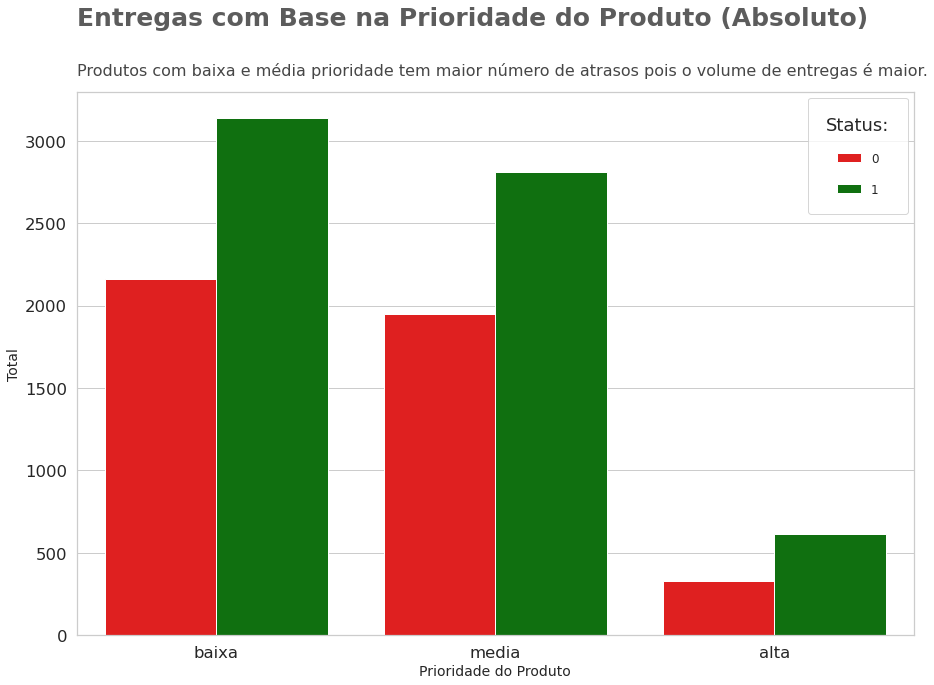

In [50]:
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

Gráfico 2 - Análise em Valores Percentuais

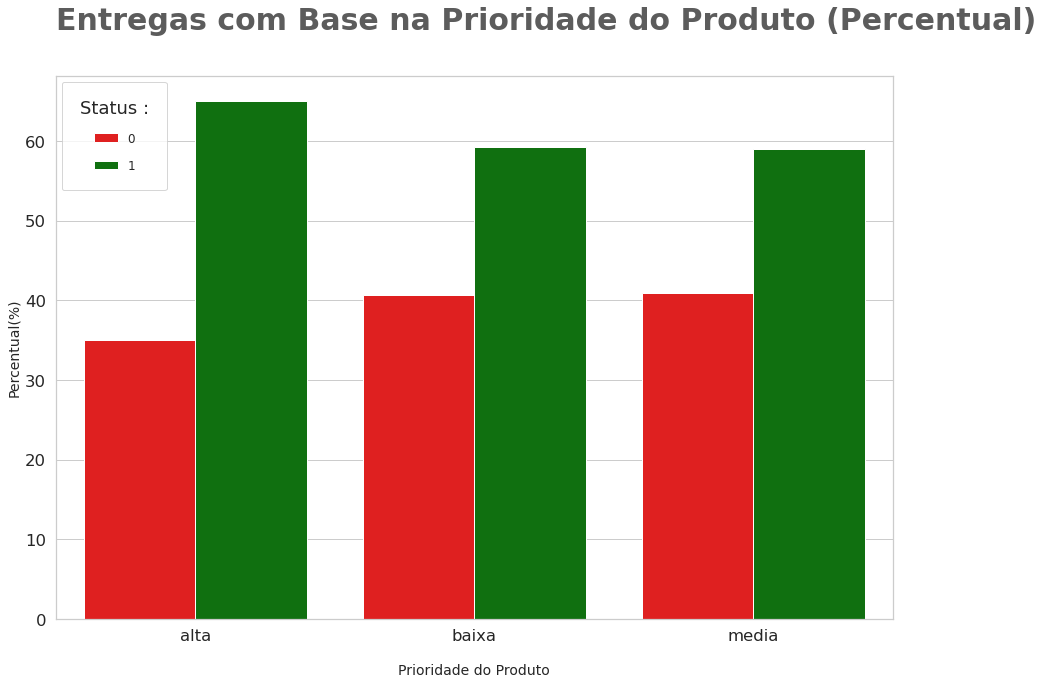

In [51]:
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75);

Quando olhamos para o valor percentual (como fizemos na pergunta anterior), concluímos que produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com média e baixa prioridade. Entregas no prazo, tem proporção quase similar entre as 3 categorias.

**3.3-Quais corredores armazenam produtos com maior proporção de entregas com atraso?**

In [52]:
df_group21 = df.groupby(['entregue_no_prazo', 'corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [53]:
df_group22 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index()
df_group22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [54]:
df_group23 = df_group21.merge(df_group22, on = 'entregue_no_prazo')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [55]:
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo',
                      'Corredor do Armazem',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor do Armazem,Total por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [56]:
df_group24 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index()
df_group24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [57]:
df_group25 = df_group21.merge(df_group24, on = 'corredor_armazem')
df_group25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [58]:
df_group25['Percentual(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo',
                      'Corredor do Armazem',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group25

,Status de Entrega no Prazo,Corredor do Armazem,Total por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


Gráfico 1 - Análise em Valores Absolutos

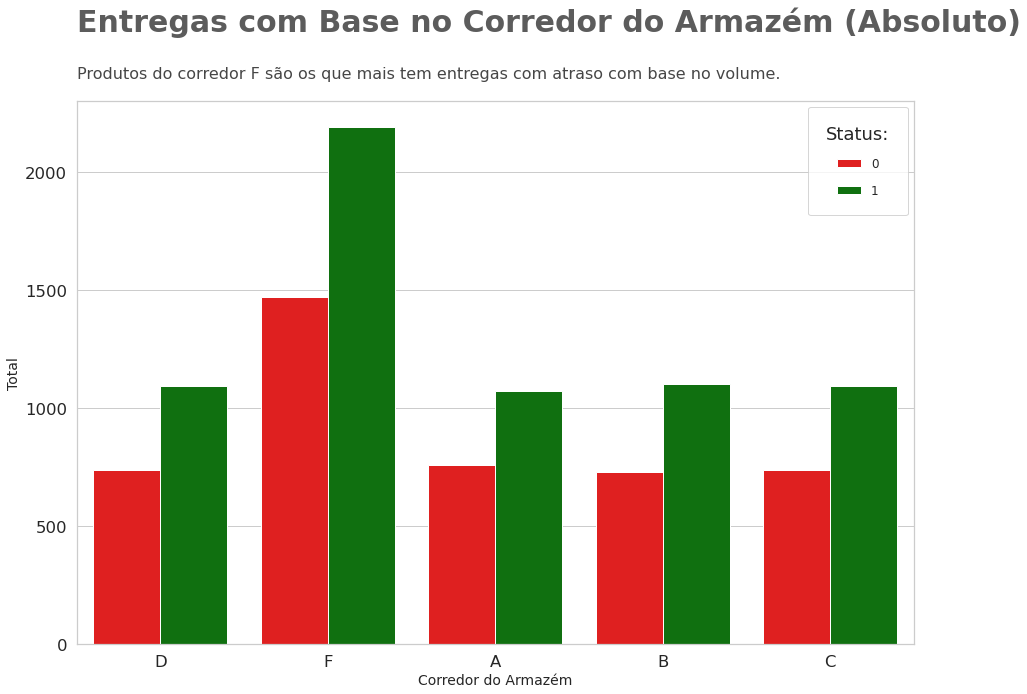

In [59]:
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

Gráfico 2 - Análise em Valores Percentuais

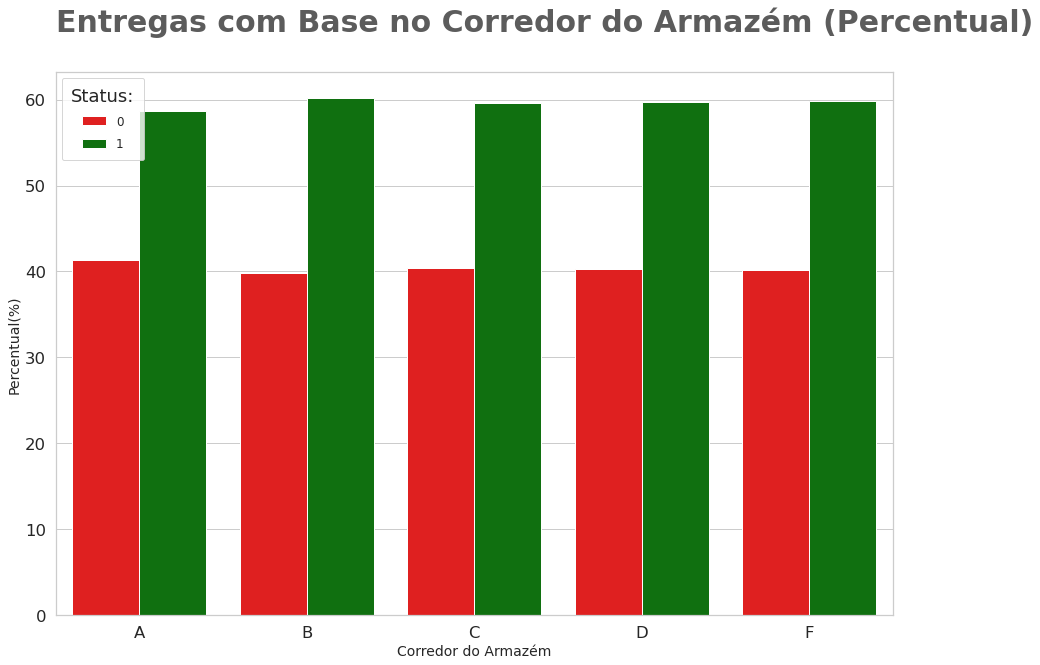

In [60]:
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group25, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75);

Vejamos que a proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.

**3.3-Como a densidade da variável que representa desconto, influencia o status de entrega dos produtos?**

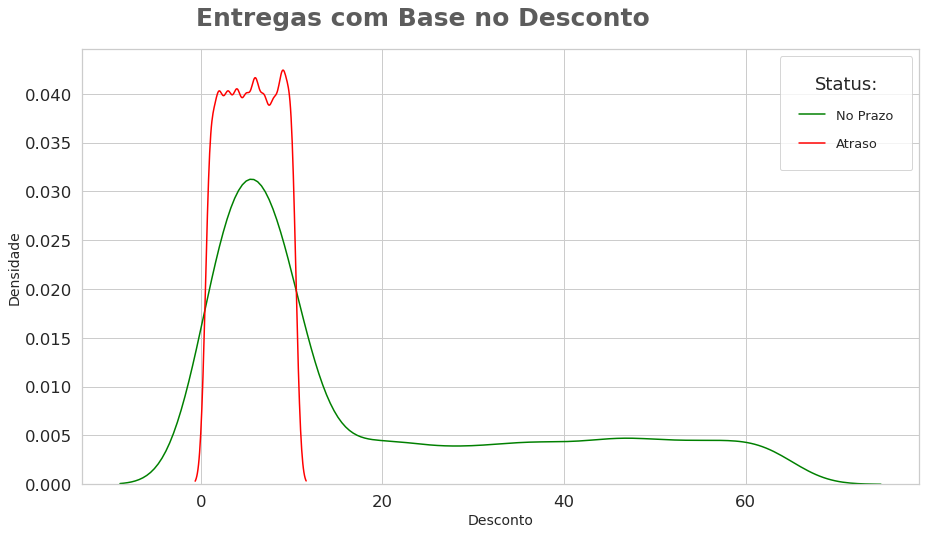

In [61]:
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75);

Podemos concluir que as entregas com baixos descontos oferecidos tendem à chegar sem atraso; porém, as entregas com mais atrasos também são aquelas com baixos descontos oferecidos.  
Portanto, o desconto não faz diferença quanto ao prazo das entregas!

Até neste ponto, foi realizado procedimentos básicos de análises; podendo agora, destinar esses dados ao trabalho de BI - construção de Dashboard, para apresentar à Diretoria, por exemplo!

## **4-Engenharia de Atributos**  
  

Nesta etapa, será aplicado uma série de técnicas e procedimentos, com a finalidade de remover, selecionar e transformar os dados; mantendo somente os atributos mais relevantes. As transformações realizadas a partir desta seção, serão voltadas para uma possível fase final do estudo, que seria desenvolver análise preditiva (*Machine Learning*).

In [62]:
# imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [84]:
#Relembrando nossas variáveis

print("Variáveis Numéricas:", nums)
print("Variáveis Categóricas:", cats)
print("Variável Target:", target)

Variáveis Numéricas: ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores', 'desconto', 'peso_gramas']
Variáveis Categóricas: ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']
Variável Target: ['entregue_no_prazo']


In [71]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [72]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [74]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

### **4.1-Limpeza dos Dados**  
  

Recomenda-se que o procedimento de limpeza dos dados, seja realizado antes da engenharia de atributos. Este procedimento é crucial para aplicar engenharia de atributos e, consequentemente, é crucial para a construção de um bom modelo de análise preditiva!

Vamos, inicialmente, verificar se existem valores ausentes:

In [78]:
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

Não existem valores ausentes em nosso conjunto de dados.

Vamos verificar se existem valores (*linhas*) duplicados:

In [76]:
df.duplicated().sum()

0

Não há valores duplicados!

Tratamento de Valores Outliers

In [79]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [80]:
df.desconto.mean()

13.372545454545454

In [81]:
df.desconto.std()

16.20494287359407

<AxesSubplot:>

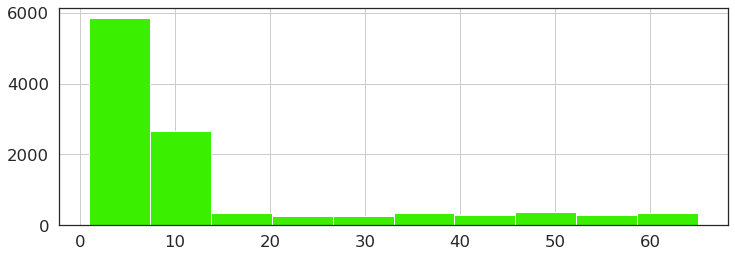

In [82]:
df.desconto.hist()

In [87]:
registros = np.array([True] * len(df))


In [88]:
np.count_nonzero(registros == True)

11000

In [89]:
np.count_nonzero(registros == False)

0

In [90]:
# Loop por cada variável numérica

for col in nums:
    #Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col]))

    #Mantém valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [91]:
np.count_nonzero(registros == True)

10643

In [92]:
np.count_nonzero(registros == False)

357

In [93]:
df = df[registros]

In [95]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


### **4.2-Tratamento de Desbalanceamento de Classe (verificação)**  

Este é um procedimento que deve ser feito nos dados de treino de um modelo de ML, após o pré-processamento. Vamos verificar como está o balanceamento das classes:

In [96]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

Neste conjunto de dados, temos as classes (*da variável target*) relativamente balanceadas! Portanto, não seria necessário aplicar nenhum procedimento para balanceament, no caso de utilizar estes dados em análises preditivas!

### **4.3-Seleção de Atributos**  

Nesta seção, mostraremos as variáveis que serão usadas na Engenharia de Atributos com a respectiva justificativa.

In [97]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
8904,8905,D,Aviao,6,4,270,4,baixa,F,10,1698,0
1965,1966,B,Navio,3,4,226,3,media,F,26,2299,1
1140,1141,D,Navio,4,1,260,2,baixa,M,2,2980,1
3790,3791,C,Navio,4,2,245,2,baixa,M,8,5871,1
1446,1447,D,Navio,4,5,108,6,media,M,46,1882,1


In [98]:
# Correlação
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


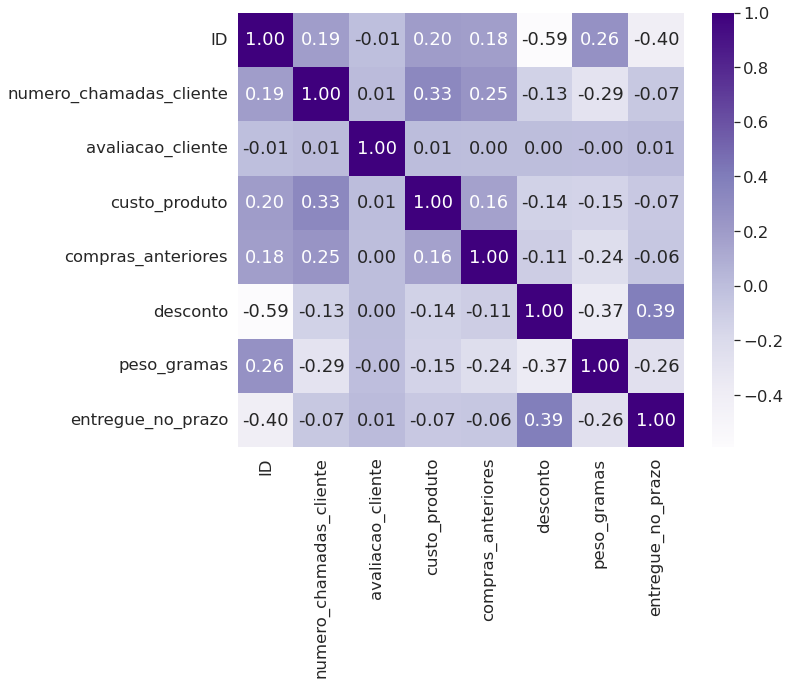

In [99]:
# Mapa de correlação

plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt='.2f');

**Decisão:** Na figura acima, os recursos que ultrapassaram o limite (+/- 0,05) na correlação com o recurso de destino (entregue_no_prazo), serão escolhidos para serem processados na Engenharia de Atributos.  
  
A variável 'avaliacao_cliente' não parece relevante e não será processada na Engenharia de Atributos. A variável 'ID' será descartada, pois não representa informação útil.

Vamos olhar agora, para as variáveis categóricas:

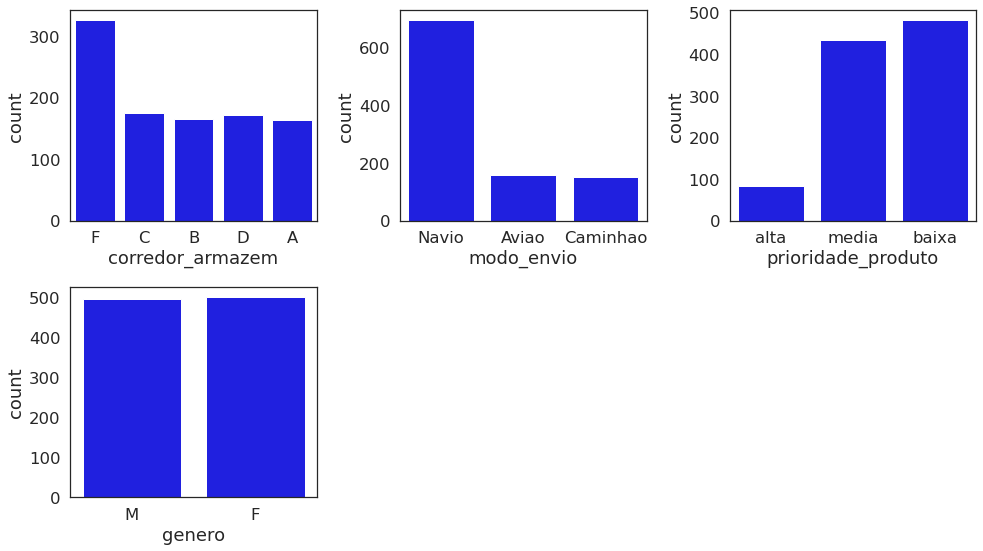

In [104]:
# Gráfico de barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (14,8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão:** Nos gráficos acima, podemos ver que a variável 'Gênero', possui contagem de classes bem homogênea. Portanto, não irá impactar nossa análise.

### **4.4-Extração de Atributos**  

Nesta seção, vamos fazer a extração de novas variáveis a partir da informação contida em outras variáveis.

In [105]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [106]:
# Criando uma cópia do dataframe
df_eng = df.copy()

In [108]:
df_eng.shape

(10643, 12)

### Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

*É importante salientar, que identificamos esta necessidade para este trabalho. A regra de negócio pode (e vai) diferenciar para cada trabalho realizado!*

In [109]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [110]:
# Criando a variável e preenchendo com nan
df_eng['performance_prioridade_envio'] = np.nan

In [111]:
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável", 
    "Não Houve Atraso")))

In [114]:
df_eng['performance_prioridade_envio'].value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [117]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
1382,1383,A,Aviao,6,2,225,6,baixa,M,44,2057,1,Não Houve Atraso
2000,2001,A,Navio,4,3,135,3,media,F,11,1322,1,Não Houve Atraso
2585,2586,F,Caminhao,4,5,246,2,media,M,31,2415,1,Não Houve Atraso
8672,8673,A,Navio,3,2,224,3,media,M,8,5869,0,Atraso Problemático
3980,3981,A,Aviao,5,3,244,2,baixa,M,5,4713,0,Atraso Tolerável


Vamos criar um relatório de análise com base nesta nova variável criada acima:

In [118]:
# Agrupando dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 'entregue_no_prazo']).agg({'prioridade_produto' : ['count']}).reset_index()
df_report1

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [119]:
# Ajustamos os nomes das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [120]:
# Pivot
df_report1 = pd.pivot_table(df_report1,
                             index = 'performance_prioridade_envio',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [121]:
# Novo ajuste nos nomes das colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [122]:
# Replace do valor nan por zero
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [124]:
# Concatenando colunas criando uma terceira variável
df_report1["Total"] = df_report1["Total Atraso"] + df_report1["Total no Prazo"]
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [125]:
# Não precisamos mais das colunas usadas na concatenação. Vamos removê-las.
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


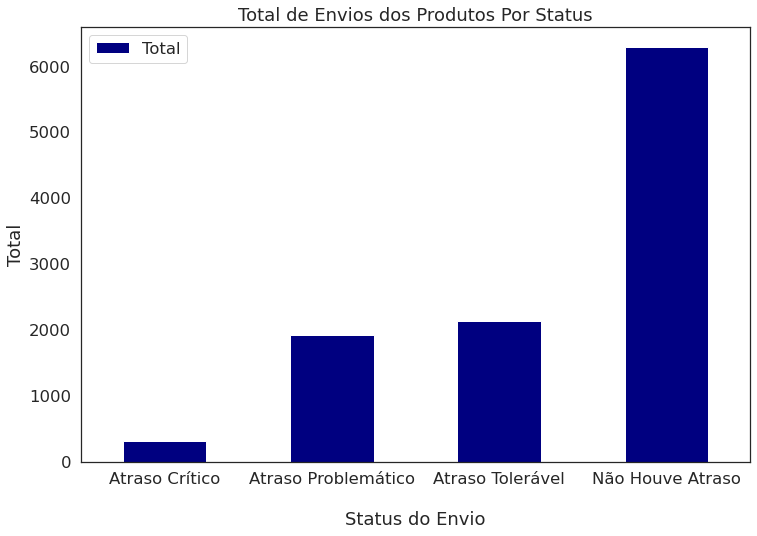

In [126]:
# Plot
df_report1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()

Podemos ver claramente que de acordo com a regra de prioridade do envio do produto, há uma diferença em termos de atraso! **Temos a nossa resposta para a pergunta levantada anteriormente nesta seção!**

### Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [127]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [128]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [129]:
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [130]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
7075,7076,F,Navio,4,3,245,4,media,M,8,5982,1,Não Houve Atraso,Não Houve Atraso
6254,6255,A,Navio,6,1,282,4,baixa,M,1,1434,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio
4579,4580,F,Navio,4,3,142,3,media,F,6,5930,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
1293,1294,B,Navio,5,5,254,5,baixa,F,35,2508,1,Não Houve Atraso,Não Houve Atraso
3744,3745,D,Navio,6,4,256,4,alta,M,2,5021,0,Atraso Crítico,Atraso Crítico na Entrega Por Navio


In [131]:
# Agrupando os dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio', 'entregue_no_prazo']).agg({'prioridade_produto' : ['count']}).reset_index()
df_report2

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [132]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453
9,Não Houve Atraso,1,6282


In [133]:
# Pivot
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [134]:
df_report2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report2

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [135]:
# Replace do valor nan por zero
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)
df_report2

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0
9,Não Houve Atraso,0.0,6282.0


In [136]:
# Concatenando colunas criando uma terceira variável
df_report2["Total"] = df_report2["Total Atraso"] + df_report2["Total no Prazo"]
df_report2

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0,51.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0,1453.0
9,Não Houve Atraso,0.0,6282.0,6282.0


In [137]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report2.drop(df_report2.columns[[1, 2]], axis = 1, inplace = True)
df_report2

,Status do Envio,Total
0,Atraso Crítico na Entrega Por Aviao,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0
2,Atraso Crítico na Entrega Por Navio,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0
9,Não Houve Atraso,6282.0


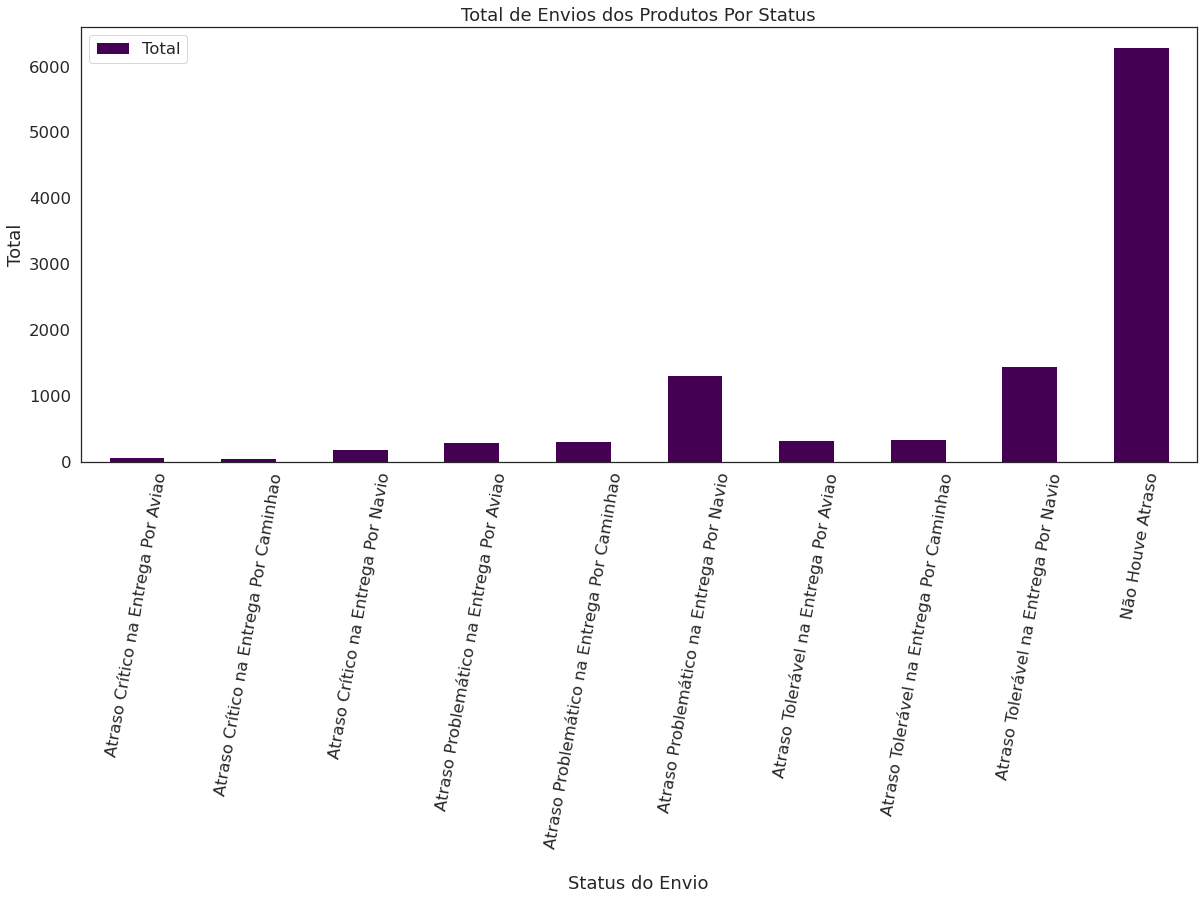

In [162]:
# Visualizando
df_report2.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'viridis',
                figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

Podemos concluir que há, de fato, uma relação direta entre prioridade do envio e modo de envio - *transporte por navio*.

### Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Vamos criar duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [142]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
8659,8660,F,Navio,6,2,269,4,media,F,10,1166,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
10051,10052,F,Navio,6,1,113,2,media,F,7,5234,1,Não Houve Atraso,Não Houve Atraso
1808,1809,A,Navio,4,1,151,5,alta,M,28,1148,1,Não Houve Atraso,Não Houve Atraso
5853,5854,B,Navio,6,1,185,4,alta,F,10,5254,1,Não Houve Atraso,Não Houve Atraso
5285,5286,F,Navio,6,2,304,4,baixa,F,9,1392,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio


In [143]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [145]:
# Variável 1
df_eng['faixa_desconto'] = np.where(df_eng.desconto >= 12, 'Desconto Acima da Media', 'Desconto Abaixo da Media')
df_eng['faixa_desconto'].value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [146]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto
4618,4619,C,Navio,3,4,171,3,baixa,F,5,5872,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media
6776,6777,A,Navio,4,5,257,2,media,M,5,4127,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media
5840,5841,A,Navio,5,2,249,6,baixa,M,8,5633,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media
5897,5898,F,Aviao,5,4,151,5,baixa,F,1,4122,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Aviao,Desconto Abaixo da Media
8706,8707,D,Navio,5,3,222,4,media,M,2,4060,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media


In [147]:
# Variável 2
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Acima da Media", 
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Abaixo da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Acima da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Abaixo da Media",
   "NA"))))

In [148]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
1640,1641,A,Aviao,3,2,227,3,media,M,21,2351,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
9153,9154,B,Caminhao,5,1,226,6,baixa,M,5,1078,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Caminhao,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2940,2941,D,Navio,3,1,263,3,media,M,6,2715,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
1545,1546,B,Navio,4,3,251,3,media,F,46,2632,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
7762,7763,C,Navio,6,2,259,5,media,M,1,1357,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media


In [149]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [150]:
# Agrupando os dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto', 
                             'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [151]:
df_report3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_report3

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [152]:
# Pivot
df_report3 = pd.pivot_table(df_report3,
                             index = 'performance_faixa_desconto',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report3

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [153]:
df_report3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report3

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [154]:
# Replace do valor nan por zero
df_report3['Total Atraso'] = df_report3['Total Atraso'].replace(np.nan, 0)
df_report3['Total no Prazo'] = df_report3['Total no Prazo'].replace(np.nan, 0)
df_report3

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0


In [156]:
# Concatenando colunas criando uma terceira variável
df_report3["Total"] = df_report3["Total Atraso"] + df_report3["Total no Prazo"]
df_report3

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0,2374.0


In [157]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report3.drop(df_report3.columns[[1, 2]], axis = 1, inplace = True)
df_report3

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,3908.0
2,Entrega no Prazo com Desconto Acima da Media,2374.0


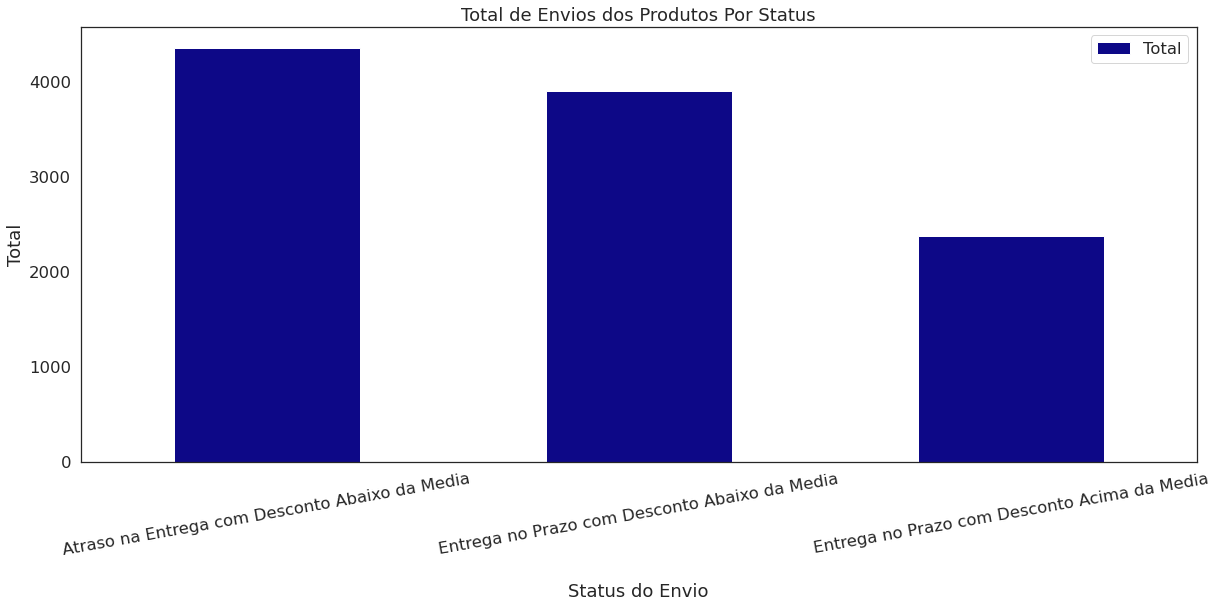

In [161]:
# Visualizando
df_report3.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (20,8))
plt.xticks(rotation = 10)
plt.show()

Neste momento, podemos perceber que aparentemente existe uma relação entre desconto e o prazo de entrega. Aparentemente, quando o desconto é menor, leva ao atraso. A **causalidade deste evento** pode e deve ser estudada, porém ficará para uma versão futura do trabalho. Já podemos apresentar este indicativo aos gestores.

Vamos salvar nosso conjunto atual de dados, com todas alterações que realizamos até aqui:

In [163]:
df_eng.to_csv('dados/df_eng.csv', sep = ',', encoding = 'utf-8')